<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ideas:" data-toc-modified-id="Ideas:-0.1"><b>Ideas:<b></b></b></a></span></li></ul></li><li><span><a href="#We-have-now-narrrowed-down-our-dataset-to-only-the-people-who-were-successfully-interviewed-in-all-3-waves." data-toc-modified-id="We-have-now-narrrowed-down-our-dataset-to-only-the-people-who-were-successfully-interviewed-in-all-3-waves.-1">We have now narrrowed down our dataset to only the people who were successfully interviewed in all 3 waves.</a></span></li><li><span><a href="#a)-Gender" data-toc-modified-id="a)-Gender-2">a) Gender</a></span></li><li><span><a href="#b)-Race" data-toc-modified-id="b)-Race-3">b) Race</a></span></li><li><span><a href="#c)-Age---THIS-IS-NOT-CORRECT-BUT-ITS-HERE-FOR-NOW" data-toc-modified-id="c)-Age---THIS-IS-NOT-CORRECT-BUT-ITS-HERE-FOR-NOW-4">c) Age - THIS IS NOT CORRECT BUT ITS HERE FOR NOW</a></span></li><li><span><a href="#1.-Individuals-Labour" data-toc-modified-id="1.-Individuals-Labour-5">1. Individuals Labour</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6">Data Preprocessing</a></span></li><li><span><a href="#Employment" data-toc-modified-id="Employment-7">Employment</a></span><ul class="toc-item"><li><span><a href="#How-many-people-lost-their-job-at-some-point-over-the-course-of-time" data-toc-modified-id="How-many-people-lost-their-job-at-some-point-over-the-course-of-time-7.1">How many people lost their job at some point over the course of time</a></span></li></ul></li><li><span><a href="#2.-Business" data-toc-modified-id="2.-Business-8">2. Business</a></span></li></ul></div>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
sns.set()

# 1) Data Cleaning

### <b>Ideas:<b>
    - Only look at people who were successfully iterviewed all 3 waves
    - Merge Wave1, Wave2 and Wave3 in order to look at the same population
    -
    -

    
    
    

In [19]:
Wave1 = pd.read_stata("Data/Wave1.dta")
# display(Wave1.head(5))
# Wave1.info()

num_rows_start = Wave1.shape[0]

Wave1 = Wave1[Wave1['w1_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave1.shape[0]

# display(Wave1.head(5))
# Wave1.info()
print("Number of people who were not interviewed in Wave 1: ", deleted_rows)

Number of people who were not interviewed in Wave 1:  0


In [20]:
Wave2 = pd.read_stata("Data/Wave2.dta")
# display(Wave2.head(5))
# Wave2.info()

num_rows_start = Wave2.shape[0]

Wave2 = Wave2[Wave2['w2_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave2.shape[0]

# display(Wave2.head(5))
# Wave2.info()
print("Number of people who were not interviewed in Wave 2: ", deleted_rows)

Number of people who were not interviewed in Wave 2:  1375


In [21]:
Wave3 = pd.read_stata("Data/Wave3.dta")
# display(Wave3.head(5))
# Wave3.info()

num_rows_start = Wave3.shape[0]

Wave3 = Wave3[Wave3['w3_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave3.shape[0]

# display(Wave3.head(5))
# Wave3.info()
print("Number of people who were not interviewed in Wave 3: ", deleted_rows)

Number of people who were not interviewed in Wave 3:  1968


## We have now narrrowed down our dataset to only the people who were successfully interviewed in all 3 waves.

# 2) Merge Wave1, Wave2 and Wave3

In [22]:
frames = [Wave1, Wave2, Wave3]
temp = pd.merge(Wave1, Wave2, how='inner', on='pid')
df = pd.merge(temp, Wave3, how='inner', on='pid')

display(df.head(5))
print("Number of people who were successfully interviewed in all 3 waves: ", df.shape[0])

,pid,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,w1_nc_intrv_y,w1_nc_duration,w1_nc_dob_m,w1_nc_dob_y,w1_nc_gen,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,Successfully Interviewed,609,15th,May,2020,15.2,July,1971,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,Successfully Interviewed,609,22nd,May,2020,15.37,February,1970,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,Successfully Interviewed,624,4th,June,2020,25.27,June,1989,Man,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,Successfully Interviewed,644,4th,June,2020,17.18,June,1972,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,Successfully Interviewed,630,27th,May,2020,21.13,May,1978,Man,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN


Number of people who were successfully interviewed in all 3 waves:  4508


In [23]:
personal_info_cols = [  'pid','w1_nc_dob_y', 'w2_nc_dob_y', 'w3_nc_dob_y',
                        'w1_nc_dob_m', 'w2_nc_dob_m', 'w3_nc_dob_m', 
                        'w1_nc_gen', 'w2_nc_gen', 'w3_nc_gen',
                        'w1_nc_popgrp',  'w3_nc_popgrp']

df_personal_all3 = df[personal_info_cols].copy()
df_personal_all3

,pid,w1_nc_dob_y,w2_nc_dob_y,w3_nc_dob_y,w1_nc_dob_m,w2_nc_dob_m,w3_nc_dob_m,w1_nc_gen,w2_nc_gen,w3_nc_gen,w1_nc_popgrp,w3_nc_popgrp
0,301067,1971,1971,1971,July,July,July,Woman,Woman,Woman,African/Black,African/Black
1,301079,1970,1970,1970,February,February,February,Woman,Woman,Woman,African/Black,African/Black
2,301082,1989,1989,1989,June,June,June,Man,Man,Man,African/Black,African/Black
3,301086,1972,1972,1972,June,June,June,Woman,Woman,Woman,African/Black,African/Black
4,301088,1978,1978,1978,May,May,May,Man,Man,Man,African/Black,African/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,1989,1990,1989,August,August,August,Woman,Woman,Woman,African/Black,African/Black
4504,799619,1978,1978,1978,September,October,September,Man,Man,Man,African/Black,African/Black
4505,799644,1976,1976,1976,January,January,January,Woman,Woman,Woman,African/Black,African/Black
4506,799780,1996,1996,1996,July,July,July,Woman,Woman,Woman,Coloured,Coloured


There are several cases where the values are inconsistent across the different waves. I believe this is an input error since many of the entires will match. For example, the year of birth in record #4503 is (1989, 1990, 1989) yet the month of birth and gender is consistent (August, Woman). 
To clean this up, we should look at the triplet of columns (that we are interested in - birth date, gender, etc) and set all 3 values to whichever one appears most often.

In [24]:
df_personal = pd.DataFrame()
df_personal['pid'] = df_personal_all3['pid']
for index, row in df_personal_all3.iterrows():
    years = row[['w1_nc_dob_y', 'w2_nc_dob_y', 'w3_nc_dob_y']]
    months = row[['w1_nc_dob_m', 'w2_nc_dob_m', 'w3_nc_dob_m']]
    genders = row[['w1_nc_gen', 'w2_nc_gen', 'w3_nc_gen']]
    races = row[['w1_nc_popgrp',  'w3_nc_popgrp']]

    YearOfBirth = years.value_counts().idxmax()
    MonthOfBirth = months.value_counts().idxmax()
    Gender = genders.value_counts().idxmax()   
    Race = races.value_counts().idxmax()

    df_personal.loc[index, 'Age'] = 2020 - pd.to_numeric(YearOfBirth, errors='coerce')
    df_personal.loc[index, 'YearOfBirth'] = YearOfBirth
    df_personal.loc[index, 'MonthOfBirth'] = MonthOfBirth
    df_personal.loc[index, 'Gender'] = Gender
    df_personal.loc[index, 'Race'] = Race

df_personal

,pid,Age,YearOfBirth,MonthOfBirth,Gender,Race
0,301067,49.0,1971,July,Woman,African/Black
1,301079,50.0,1970,February,Woman,African/Black
2,301082,31.0,1989,June,Man,African/Black
3,301086,48.0,1972,June,Woman,African/Black
4,301088,42.0,1978,May,Man,African/Black
...,...,...,...,...,...,...
4503,799572,31.0,1989,August,Woman,African/Black
4504,799619,42.0,1978,September,Man,African/Black
4505,799644,44.0,1976,January,Woman,African/Black
4506,799780,24.0,1996,July,Woman,Coloured


# 3) Clear reduntant columns and add personal info to main df

In [25]:
df_dropped = df.drop(personal_info_cols, axis=1)
df_main = pd.concat([df_personal, df_dropped], axis=1)
df_main

,pid,Age,YearOfBirth,MonthOfBirth,Gender,Race,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,49.0,1971,July,Woman,African/Black,Successfully Interviewed,609,15th,May,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,50.0,1970,February,Woman,African/Black,Successfully Interviewed,609,22nd,May,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,31.0,1989,June,Man,African/Black,Successfully Interviewed,624,4th,June,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,48.0,1972,June,Woman,African/Black,Successfully Interviewed,644,4th,June,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,42.0,1978,May,Man,African/Black,Successfully Interviewed,630,27th,May,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,31.0,1989,August,Woman,African/Black,Successfully Interviewed,609,15th,May,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
4504,799619,42.0,1978,September,Man,African/Black,Successfully Interviewed,616,21st,May,...,5,Rudland & George (RG),,10,Pall Mall,,Friendly,Sepedi,Sesotho,NaN
4505,799644,44.0,1976,January,Woman,African/Black,Successfully Interviewed,633,16th,June,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4506,799780,24.0,1996,July,Woman,Coloured,Successfully Interviewed,614,10th,June,...,80,Rothmans,,8,Rothmans,,Neither hostile nor friendly,Afrikaans,NaN,NaN


# 4) Delete all useless columns

In [26]:
useless_cols = [    'w1_nc_intrv_c','w2_nc_intrv_c','w3_nc_intrv_c',
                    'w1_nc_intrv_d','w2_nc_intrv_d','w3_nc_intrv_d',
                    'w1_nc_intrv_m','w2_nc_intrv_m','w3_nc_intrv_m',
                    'w1_nc_intrv_y','w2_nc_intrv_y','w3_nc_intrv_y',
                    'w1_nc_duration', 'w2_nc_duration','w3_nc_duration',
                    'w1_nc_popgrp_o']
df_new = df_main.drop(useless_cols, axis=1)
df_new


,pid,Age,YearOfBirth,MonthOfBirth,Gender,Race,w1_nc_outcome,w1_nc_edschgrd,w1_nc_edter,w1_nc_prov,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,49.0,1971,July,Woman,African/Black,Successfully Interviewed,Grade 9 (Std. 7/ Form 2),No,Gauteng,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,50.0,1970,February,Woman,African/Black,Successfully Interviewed,Grade 6 (Std. 4),NaN,Gauteng,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,31.0,1989,June,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Gauteng,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,48.0,1972,June,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,Yes,KwaZulu-Natal,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,42.0,1978,May,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),Yes,Eastern Cape,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,31.0,1989,August,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,No,Limpopo,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
4504,799619,42.0,1978,September,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Free State,...,5,Rudland & George (RG),,10,Pall Mall,,Friendly,Sepedi,Sesotho,NaN
4505,799644,44.0,1976,January,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,No,KwaZulu-Natal,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4506,799780,24.0,1996,July,Woman,Coloured,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Western Cape,...,80,Rothmans,,8,Rothmans,,Neither hostile nor friendly,Afrikaans,NaN,NaN


# 5) Plot demographic distributions
## a) Gender

Text(0, 0.5, '')

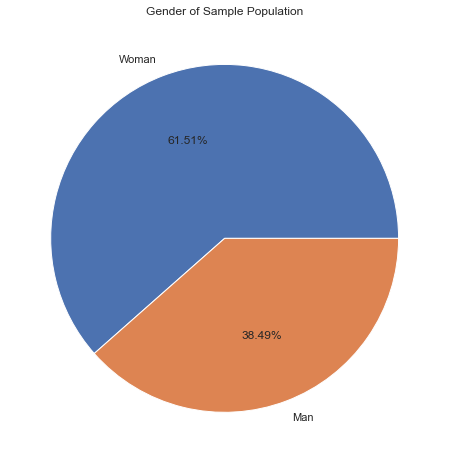

In [27]:
gender = df_new.Gender.value_counts()/df_new.shape[0]*100
gender.plot(kind='pie', figsize=(8,8), autopct = '%.2f%%')
plt.title('Gender of Sample Population')
plt.ylabel('')

## b) Race

Text(0, 0.5, '')

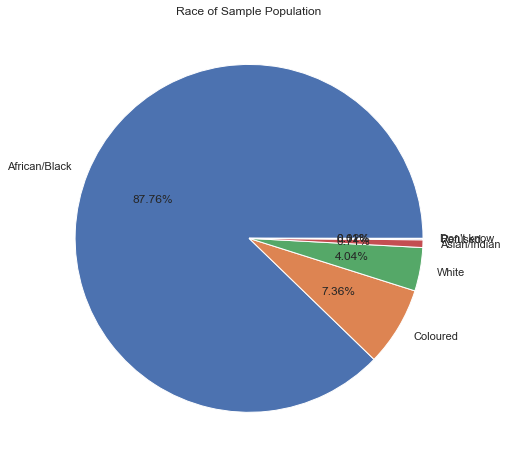

In [28]:
race = df_new.Race.value_counts()/df_new.shape[0]*100
race.plot(kind='pie', figsize=(8,8), autopct = '%.2f%%')
plt.title('Race of Sample Population')
plt.ylabel('')

## c) Age - THIS IS NOT CORRECT BUT ITS HERE FOR NOW

Text(0, 0.5, 'Frequency')

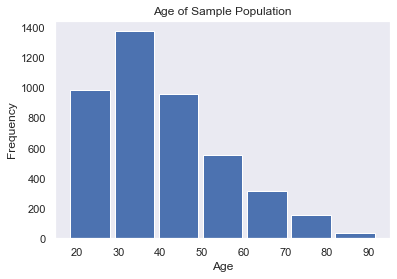

In [29]:
age = df_new.Age
age.plot.hist(grid=False, bins=7, rwidth=0.9)
plt.title('Age of Sample Population')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Labour variables

In [30]:
def replace(x):
    if x == "Other" or x == "Don't know" or x == "Refused" or x=='Missing' or x== "Don't Know":
        return np.NaN
    return x

## 1. Individuals Labour

Description
* **Name**: Description

In [31]:
lbdf = pd.DataFrame()
##Education and Job
ed_df = pd.DataFrame()
ed_df['GradeW1'] = df_new.w1_nc_edschgrd
ed_df['GradeW2'] = df_new.w2_nc_edschgrd
ed_df['GradeW3'] = df_new.w3_nc_edschgrd
ed_df['TertiaryW1'] = df_new.w1_nc_edter
ed_df['TertiaryW2'] = df_new.w2_nc_edter
ed_df['TertiaryW3'] = df_new.w3_nc_edter


#lb_df['Highest_Grade'] = ed_df[['GradeW1','GradeW2','GradeW3']].value_counts().idmax()
#lb_df['Comp_Tert'] = ed_df[['TertiaryW1','TertiaryW2','TertiaryW3']].value_counts().idmax()

# Data for February 
lbdf['job_in_feb'] = df_new.w1_nc_em_feb
lbdf['work_in_feb'] = df_new.w1_nc_emany_feb
lbdf['work_days_feb'] = df_new.w1_nc_emdays_feb
lbdf['work_hours_per_day_feb'] = df_new.w1_nc_emhrs_feb
lbdf['take_home_pay_feb'] = df_new.w1_nc_eminc_feb
lbdf['usual_Work_feb'] = df_new.w1_nc_emwrk_isco_c

#Data for April
lbdf['job_in_apr'] = df_new.w1_nc_em_apr
lbdf['work_in_apr'] = df_new.w1_nc_emany_apr
lbdf['work_days_apr'] = df_new.w1_nc_emdays_apr
lbdf['work_hours_per_day_apr'] = df_new.w1_nc_emhrs_apr
lbdf['take_home_pay_apr'] = df_new.w1_nc_eminc_apr
lbdf['return_to_job_apr'] = df_new.w1_nc_emreturn

# Data for June 
lbdf['job_in_june'] = df_new.w2_nc_em_june
lbdf['work_in_june'] = df_new.w2_nc_emany_june
lbdf['work_days_june'] = df_new.w2_nc_emdays_june
lbdf['work_hours_per_day_june'] = df_new.w2_nc_emhrs_june
lbdf['take_home_pay_june'] = df_new.w2_nc_eminc_june
lbdf['return_to_job_june'] = df_new.w2_nc_emreturn
lbdf['able_to_work_from_home_june'] = df_new.w2_nc_emwrkhm
lbdf['usual_Work_june'] = df_new.w2_nc_emwrk_isco_c

# Data for Oct
lbdf['job_in_oct'] = df_new.w3_nc_em_oct
lbdf['work_in_oct'] = df_new.w3_nc_emany_oct
lbdf['work_days_oct'] = df_new.w3_nc_emdays_oct
lbdf['work_hours_per_day_oct'] = df_new.w3_nc_emhrs_oct
lbdf['take_home_pay_oct'] = df_new.w3_nc_eminc_oct
lbdf['return_to_job_oct'] = df_new.w3_nc_emreturn
lbdf['able_to_work_from_home_oct'] = df_new.w3_nc_emwrkhm
lbdf['usual_Work_oct'] = df_new.w3_nc_emwrk_isco_c

In [32]:
lbdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4508 entries, 0 to 4507
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   job_in_feb                   4508 non-null   category
 1   work_in_feb                  2468 non-null   category
 2   work_days_feb                2110 non-null   category
 3   work_hours_per_day_feb       1943 non-null   category
 4   take_home_pay_feb            2110 non-null   category
 5   usual_Work_feb               1416 non-null   category
 6   job_in_apr                   4083 non-null   category
 7   work_in_apr                  3210 non-null   category
 8   work_days_apr                1416 non-null   category
 9   work_hours_per_day_apr       1088 non-null   category
 10  take_home_pay_apr            1027 non-null   category
 11  return_to_job_apr            2822 non-null   category
 12  job_in_june                  4508 non-null   category
 13  wor

## Data Preprocessing

In [33]:
def check_work(row):
    if row['job_in_feb'] == 'Yes' or row['work_in_feb']=='Yes':
        return 1
    else:
        return 0 

In [34]:
lbdf.apply (lambda row: check_work(row), axis=1)

0       0
1       0
2       1
3       1
4       0
       ..
4503    0
4504    0
4505    0
4506    0
4507    0
Length: 4508, dtype: int64

## Employment

In [35]:
lbdf.job_in_feb.value_counts()

No                 2425
Yes                1615
No, I'm retired     425
Refused              36
Don't know            7
Name: job_in_feb, dtype: int64

In [36]:
lbdf.job_in_feb = lbdf.job_in_feb.apply(replace)
lbdf.job_in_feb.value_counts()

No                 2425
Yes                1615
No, I'm retired     425
Name: job_in_feb, dtype: int64

In [37]:
lbdf = lbdf.applymap(replace)

In [38]:
tdf = pd.DataFrame()

In [39]:
tdf['Job'] = lbdf.job_in_feb.apply(lambda x: 1 if x=='Yes' else 0 )

In [40]:
tdf['Work'] = lbdf.work_in_feb.apply(lambda x: 1 if x=='Yes' else 0 )

In [41]:
tdf['Either'] = tdf['Job'] + tdf['Work']

In [42]:
tdf.Either.value_counts()

0    2676
1    1832
Name: Either, dtype: int64

We now take our data and divide it into smaller dataframes to analyze

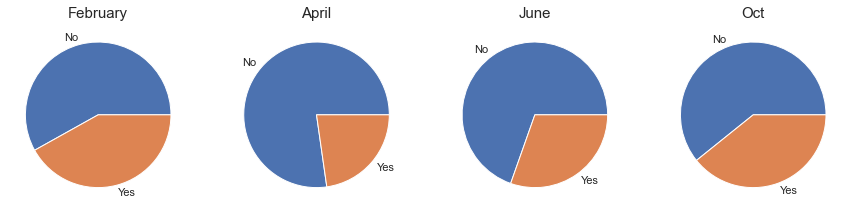

In [43]:
emp_df = lbdf.copy()
emp_df = emp_df[['job_in_feb','job_in_apr','job_in_june','job_in_oct']]

emp_df = emp_df[(emp_df['job_in_feb']=='Yes') | (emp_df['job_in_feb']=='No')]
emp_df = emp_df[(emp_df['job_in_apr']=='Yes') | (emp_df['job_in_apr']=='No')]
emp_df = emp_df[(emp_df['job_in_june']=='Yes') | (emp_df['job_in_june']=='No')]
emp_df= emp_df[(emp_df['job_in_oct']=='Yes') | (emp_df['job_in_oct']=='No')]


fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4,figsize=(15,15))

ax1.pie(emp_df.job_in_feb.value_counts(),labels = ['No','Yes'])
ax1.set_title('February', fontsize=15)

ax2.pie(emp_df.job_in_apr.value_counts(),labels = ['No','Yes'])
ax2.set_title('April', fontsize=15)

ax3.pie(emp_df.job_in_june.value_counts(),labels = ['No','Yes'])
ax3.set_title('June', fontsize=15)

ax4.pie(emp_df.job_in_oct.value_counts(),labels = ['No','Yes'])
ax4.set_title('Oct', fontsize=15)

plt.show()

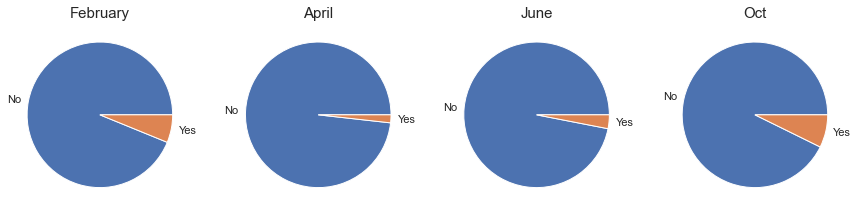

In [44]:
emp_df = lbdf.copy()
emp_df = emp_df[['work_in_feb','work_in_apr','work_in_june','work_in_oct']]

emp_df = emp_df[(emp_df['work_in_feb']=='Yes') | (emp_df['work_in_feb']=='No')]
emp_df = emp_df[(emp_df['work_in_apr']=='Yes') | (emp_df['work_in_apr']=='No')]
emp_df = emp_df[(emp_df['work_in_june']=='Yes') | (emp_df['work_in_june']=='No')]
emp_df= emp_df[(emp_df['work_in_oct']=='Yes') | (emp_df['work_in_oct']=='No')]


fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4,figsize=(15,15))

ax1.pie(emp_df.work_in_feb.value_counts(),labels = ['No','Yes'])
ax1.set_title('February', fontsize=15)

ax2.pie(emp_df.work_in_apr.value_counts(),labels = ['No','Yes'])
ax2.set_title('April', fontsize=15)

ax3.pie(emp_df.work_in_june.value_counts(),labels = ['No','Yes'])
ax3.set_title('June', fontsize=15)

ax4.pie(emp_df.work_in_oct.value_counts(),labels = ['No','Yes'])
ax4.set_title('Oct', fontsize=15)

plt.show()

### How many people lost their job at some point over the course of time

In [45]:
lost_job = emp_df[(emp_df.job_in_feb=='Yes')&(emp_df.job_in_apr=='No')|
          (emp_df.job_in_apr=='Yes')&(emp_df.job_in_june=='No')|
          (emp_df.job_in_june=='Yes')&(emp_df.job_in_oct=='No')]

len(lost_job)/len(emp_df)*100

AttributeError: 'DataFrame' object has no attribute 'job_in_feb'

The analysis here will include looking at how employment changed,whether or not people have jobs to return to, how work times changed, how people's income changed. I think an obvious relationship which is necessary to include is how peoples ability to work from home effects their employment over the course of the waves. Also think that including an analysis into which type of work (job_df) was the safest will be beneficial and potentially looking at wether or not a tertiary education helped you retain your job.

## 2. Business

In [ ]:
bdf = pd.DataFrame()

#Data for February 
bdf['Any_business_feb'] = df_new.w1_nc_ems_feb
bdf['Num_of_emp_feb'] = df_new.w1_nc_emsnumemp_feb_2


#Data for April
bdf['Any_business_apr'] = df_new.w1_nc_ems_apr
bdf['Num_of_emp_apr'] = df_new.w1_nc_emsnumemp_2 #Actual Number
bdf['Business_days_apr'] = df_new.w1_nc_embusdays_apr
bdf['Business_hours_apr'] = df_new.w1_nc_embushrs_apr
bdf['Pay_emp_apr'] = df_new.w1_nc_emspaysal
bdf['Likely_to_close_apr'] = df_new.w1_nc_emscls

#Data for June 
bdf['Any_business_june'] = df_new.w2_nc_ems_june
bdf['Num_of_emp_changed_june'] = df_new.w2_nc_emsemp_june
bdf['Business_days_june'] = df_new.w2_nc_embusdays_june
bdf['Business_hours_june'] = df_new.w2_nc_embushrs_june
bdf['Pay_emp_apr'] = df_new.w2_nc_emspaysal_june
bdf['Likely_to_close_june'] = df_new.w2_nc_emscls

#Data for October
bdf['Any_business_oct'] = df_new.w3_nc_ems_oct
bdf['Num_of_emp_changed_oct'] = df_new.w3_nc_emsemp_oct
bdf['Business_days_oct'] = df_new.w3_nc_embusdays_oct
bdf['Business_hours_oct'] = df_new.w3_nc_embushrs_oct
bdf['Pay_emp_oct'] = df_new.w3_nc_emspaysal_oct
bdf['Likely_to_close_oct'] = df_new.w3_nc_emscls

In [ ]:
bdf[bdf['Any_business_feb']=='Yes'].info()